the job

1. Univariate Distribution Terms
- Mean & Median: central tendency of a numeric feature.
- Mode: most frequent value (especially for categorical data).
- Variance & Standard Deviation: spread of values around the mean.
- Skewness: asymmetry of the distribution (left- vs. right-leaning tail).
- Kurtosis: “tailedness” or how heavy/extreme the distribution’s tails are.
- Modality: number of peaks in a distribution (uni-, bi- or multimodal).
- Outliers: values that lie far outside the bulk of the data (e.g. beyond 1.5×IQR).

2. Pairwise & Multivariate Relationships
- Covariance & Correlation: measures of linear association between two features (correlation is standardized).
- Multicollinearity: when two or more predictors are highly correlated, leading to redundancy.
- Confounding: a hidden variable that influences both feature and target, biasing apparent relationships.

3. Categorical Data Concepts
- Cardinality: number of unique categories in a feature.
- Imbalance: skewed class frequencies (e.g. 95% “no-churn” vs. 5% “churn”).
- Level Sparsity: categories with very few observations.

4. Time-Series & Temporal Patterns
- Trend: long-term increase or decrease in the series.
- Seasonality: regular, repeating pattern (daily, weekly, annual).
- Stationarity: statistical properties (mean, variance) constant over time.
- Autocorrelation: correlation of a series with its own past values.

5. Model Fit & Diagnostics
- Residuals: differences between observed and predicted values.
- Heteroscedasticity: non-constant residual variance (fan-shaped residual plot).
- Bias–Variance Tradeoff: balancing underfitting (high bias) against overfitting (high variance).

6. Basic Evaluation Metrics
- RMSE & MAE: root mean squared error and mean absolute error for regression.
- R²: proportion of variance explained by the model.
- Precision, Recall, F1-Score: classification metrics for positive-class performance.
- ROC-AUC: how well a model ranks positive vs. negative cases.

In [1]:
# https://github.com/a-milenkin/Competitive_Data_Science

import os
import shutil
import pandas as pd
import numpy as np
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

import random
DEFAULT_RANDOM_SEED = 2021
def set_all_seeds(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
set_all_seeds(seed=DEFAULT_RANDOM_SEED)

### 1. Simple classification (catboost)

(2337, 10)


car_id           model  car_type fuel_type  car_rating  \
366   x-3347185z  Kia Rio X-line   economy    petrol       5.040   
2046  O-7679980f   MINI CooperSE  business   electro       4.380   
1887  P-2086663p         VW Polo   economy    petrol       4.260   

      year_to_start  riders  year_to_work  target_reg     target_class  
366            2015   97690          2015      41.760       gear_stick  
2046           2013   40181          2021      82.570  engine_ignition  
1887           2015   95986          2018      65.720  engine_ignition

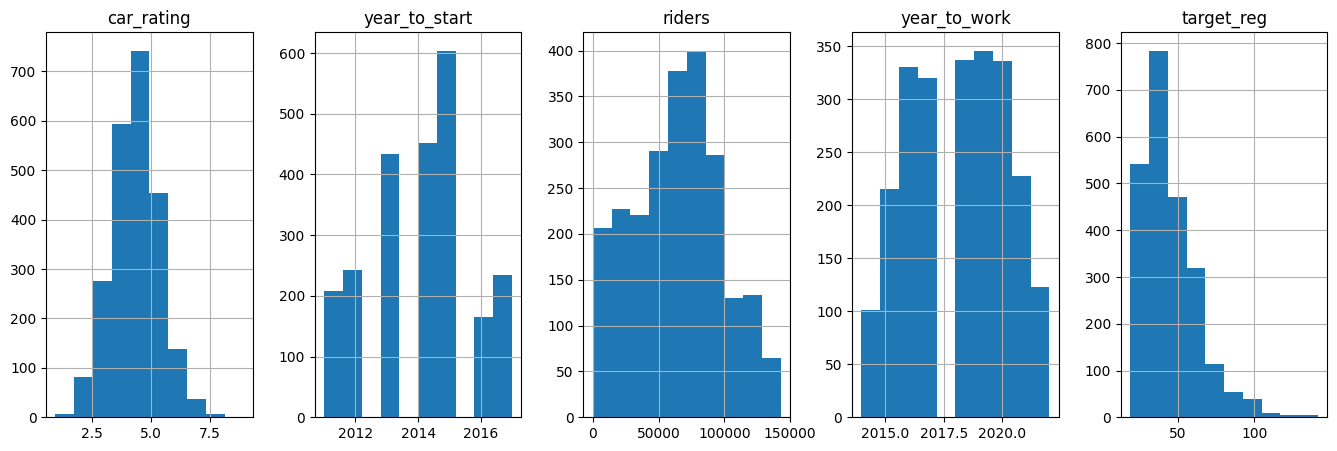

In [2]:
train = pd.read_csv("../data/car_train.csv")
print(train.shape)
train.hist(figsize=(20,5), layout=(1, 6))
train.sample(3)

In [3]:
display(train.describe())
train.info()

car_rating  year_to_start     riders  year_to_work  target_reg
count    2337.000       2337.000   2337.000      2337.000    2337.000
mean        4.354       2014.041  63711.444      2018.070      44.947
std         0.997          1.686  33755.012         2.159      17.580
min         0.980       2011.000     23.000      2014.000      18.920
25%         3.740       2013.000  41053.000      2016.000      31.670
50%         4.360       2014.000  64415.000      2018.000      40.170
75%         5.000       2015.000  86515.000      2020.000      54.790
max         8.900       2017.000 142862.000      2022.000     141.630

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [5]:
test = pd.read_csv("../data/car_test.csv")
print(test.shape)
test.sample(3)

(1913, 8)


car_id            model  car_type fuel_type  car_rating  \
1787  g-1249815S  Renault Sandero  standart    petrol       6.620   
1637  G62487539y  Hyundai Solaris   economy    petrol       3.360   
785   b34607341j      Mini Cooper  business    petrol       4.040   

      year_to_start  riders  year_to_work  
1787           2015   94502          2017  
1637           2014   61965          2020  
785            2011    2740          2018

In [6]:
categorical_features = ['car_type', 'fuel_type', 'model'] 
targets = ['target_class', 'target_reg']
dropped_features = ['car_id']

filtered_features = [i for i in train.columns if (i not in targets and i not in dropped_features)]
numerical_features = [i for i in filtered_features if (i not in categorical_features)]

print('categorical_features :', len(categorical_features), categorical_features)
print('numerical_features :', len(numerical_features), numerical_features)
print('targets', targets)

categorical_features : 3 ['car_type', 'fuel_type', 'model']
numerical_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


In [7]:
#!pip install catboost
#!pip install scikit-learn

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
clf = CatBoostClassifier(cat_features=categorical_features)

clf.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=150, plot=False)
shutil.rmtree('catboost_info') # remove catboost_info folder

y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

# saving it if needed
test['target_class'] = clf.predict(test[filtered_features]).ravel()
test[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v1.csv', index=False)

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 159ms	remaining: 2m 38s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 4.11s	remaining: 23.1s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 8.05s	remaining: 18.7s
450:	learn: 0.9655173	test: 2.4024298	best: 2.1908935 (6)	total: 11.9s	remaining: 14.5s
600:	learn: 0.7488971	test: 2.4913589	best: 2.1908935 (6)	total: 15.9s	remaining: 10.6s
750:	learn: 0.5826318	test: 2.5762847	best: 2.1908935 (6)	total: 20.1s	remaining: 6.66s
900:	learn: 0.4643456	test: 2.6651694	best: 2.1908935 (6)	total: 24.1s	remaining: 2.65s
999:	learn: 0.4027101	test: 2.7091668	best: 2.1908935 (6)	total: 26.7s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [9]:
rides = pd.read_csv("../data/rides_info.csv")
rides.sample(5)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
641896  L34789768Q  t-8913790b     i1K  2020-01-06   6.770             28   
584874  J22038765B  p-8776685b     n1n  2020-02-02   7.880            505   
372711  Z19603355K  a11345005q     h1O  2020-01-02   6.110             16   
33705   J32156960o  C-1846243L     y1W  2020-03-06   4.310             57   
67950   O11126407z  E41968356d     B1c  2020-02-17   7.080             27   

        ride_cost  speed_avg  speed_max  stop_times  distance  refueling  \
641896        247         54     82.000           2  1227.929          0   
584874       6054         50     95.000           1   825.422          0   
372711        314         48     75.000           0   809.607          0   
33705         736         58     89.000           0  3010.627          0   
67950         319         46     58.000           2  1150.135          0   

        user_ride_quality  deviation_normal  
641896              0.494             2.330  
584874            -12.837           -16.094  
372711              2.642             0.000  
33705              11.901            13.831  
67950              -1.308            -7.687

In [10]:
# information on the car 

rides_df_grouped = rides.groupby('car_id', as_index=False).agg(mean_rating = ('rating', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', 'nunique')) # nunique is pd.Series method

rides_df_grouped.head(3)

car_id  mean_rating  distance_sum  rating_min  speed_max  \
0  A-1049127W        4.255  11257529.314       0.100    179.730   
1  A-1079539w        4.088  19127650.497       0.100    184.506   
2  A-1162143G        4.662   2995193.848       0.100    180.000   

   user_ride_quality_median  deviation_normal_count  user_uniq  
0                    -0.288                     174        172  
1                     2.509                     174        173  
2                     0.640                     174        172

In [11]:
train_merged = train.merge(rides_df_grouped, on = 'car_id', how = 'left')
test_merged = test.merge(rides_df_grouped, on = 'car_id', how = 'left')

train_merged.to_csv('../tmp_data/quickstart_train.csv', index=False)
test_merged.to_csv('../tmp_data/quickstart_test.csv', index=False)

train.sample(2)

car_id          model car_type fuel_type  car_rating  year_to_start  \
1351  Y17319354d  Smart ForFour  economy    petrol       3.320           2017   
2311  e-1590992X      Kia Rio X  economy    petrol       6.260           2012   

      riders  year_to_work  target_reg     target_class  
1351  123031          2018      59.990  engine_ignition  
2311   27706          2017      29.320      electro_bug

In [12]:
filtered_features = [i for i in train_merged.columns if (i not in targets and i not in dropped_features)]
numerical_features = [i for i in filtered_features if i not in categorical_features]


print('num_features :', len(numerical_features), numerical_features)
print('cat_features :', len(categorical_features), categorical_features)
print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


In [13]:
X = train_merged[filtered_features].drop(targets, axis=1, errors='ignore')
y = train_merged['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=categorical_features)

clf.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose=150, plot=False)
shutil.rmtree('catboost_info') # remove catboost_info folder

y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_pred, y_test)}')

Learning rate set to 0.109335
0:	learn: 1.8475119	test: 1.8655808	best: 1.8655808 (0)	total: 24.2ms	remaining: 24.2s
150:	learn: 0.3200590	test: 0.5547029	best: 0.5540463 (147)	total: 4.42s	remaining: 24.9s
300:	learn: 0.1971982	test: 0.5615205	best: 0.5513186 (167)	total: 9.22s	remaining: 21.4s
450:	learn: 0.1375334	test: 0.5712868	best: 0.5513186 (167)	total: 14s	remaining: 17.1s
600:	learn: 0.0980050	test: 0.5823510	best: 0.5513186 (167)	total: 18.7s	remaining: 12.4s
750:	learn: 0.0738682	test: 0.5989975	best: 0.5513186 (167)	total: 23.5s	remaining: 7.79s
900:	learn: 0.0569120	test: 0.6151325	best: 0.5513186 (167)	total: 28.3s	remaining: 3.1s
999:	learn: 0.0495492	test: 0.6233229	best: 0.5513186 (167)	total: 31.4s	remaining: 0us

bestTest = 0.5513186112
bestIteration = 167

Shrink model to first 168 iterations.

 Accuracy: 0.782051282051282


In [14]:
fi = clf.get_feature_importance(prettified=True)
fi

Feature Id  Importances
0                  speed_max       36.035
1                mean_rating       30.904
2                 rating_min       13.939
3                      model        4.206
4                   car_type        3.881
5                  user_uniq        3.036
6   user_ride_quality_median        2.098
7               distance_sum        1.614
8                     riders        1.348
9                 car_rating        1.149
10              year_to_work        1.127
11             year_to_start        0.645
12                 fuel_type        0.018
13    deviation_normal_count        0.000

In [18]:
test_merged['target_class'] = clf.predict(test_merged[filtered_features]).ravel()
test_merged[['car_id', 'target_class']].to_csv('../subs/simple_baseline_v2.csv', index=False)

### 2. Pandas - basic functions

In [25]:
import pandas as pd
import numpy as np

# pd.Series
data = ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog']
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
s = pd.Series(data, index=labels, name='animals')
display(s)

# pd.DataFrame
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
         'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
         'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
         'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
display(df)

a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animals, dtype: object

animal   age  visits priority
a    cat 2.500       1      yes
b    cat 3.000       3      yes
c  snake 0.500       2       no
d    dog   NaN       3      yes
e    dog 5.000       2       no
f    cat 2.000       3       no
g  snake 4.500       1       no
h    cat   NaN       1      yes
i    dog 7.000       2       no
j    dog 3.000       1       no

In [116]:
display(df.loc[['a']]); print('')
display(df.loc['a', ['animal', 'age']]); print(' ')
display(df.iloc[0]); print(' ')
display(df.iloc[[1, 4], [0]]); print(' ')
display(df.iloc[1:4, 0:4]); print(' ')
display(df.reset_index().loc[1:4, 'animal':'visits']); print(' ')

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500

animal     cat
age      3.500
Name: a, dtype: object

animal         cat
age          3.500
visits           1
priority       yes
new_visits   4.500
Name: a, dtype: object

animal
b    cat
e    dog

animal   age  visits priority
b    cat 4.000       3      yes
c  snake 1.500       2       no
d    dog   NaN       3      yes

animal   age  visits
1    cat 4.000       3
2  snake 1.500       2
3    dog   NaN       3
4    dog 6.000       2

In [48]:
df.sort_values(by='age')

animal   age  visits priority  new_visits
c  snake 1.500       2       no       3.500
f    cat 3.000       3       no       6.000
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
j    dog 4.000       1       no       5.000
g  snake 5.500       1       no       6.500
e    dog 6.000       2       no       8.000
i    dog 8.000       2       no      10.000
d    dog   NaN       3      yes         NaN
h    cat   NaN       1      yes         NaN

In [51]:
df.loc[(df.visits > 2) | (df.age > 5)]

animal   age  visits priority  new_visits
b    cat 4.000       3      yes       7.000
d    dog   NaN       3      yes         NaN
e    dog 6.000       2       no       8.000
f    cat 3.000       3       no       6.000
g  snake 5.500       1       no       6.500
i    dog 8.000       2       no      10.000

In [56]:
rule_age_5 = df.age >= 5
df[rule_age_5].head(5).round(2)

animal   age  visits priority  new_visits
e    dog 6.000       2       no       8.000
g  snake 5.500       1       no       6.500
i    dog 8.000       2       no      10.000

In [68]:
df.query('age > visits')

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
e    dog 6.000       2       no       8.000
g  snake 5.500       1       no       6.500
i    dog 8.000       2       no      10.000
j    dog 4.000       1       no       5.000

In [59]:
df.filter(items = ['a', 'j'], axis=0)

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
j    dog 4.000       1       no       5.000

In [67]:
df.filter(like = 'a', axis=1) # animal, age columns

animal   age
a    cat 3.500
b    cat 4.000
c  snake 1.500
d    dog   NaN
e    dog 6.000
f    cat 3.000
g  snake 5.500
h    cat   NaN
i    dog 8.000
j    dog 4.000

In [71]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
display(pd.concat([s1, s2]))

display(
    pd.concat([s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])
)

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
display(pd.concat([df1, df2]))

0    a
1    b
0    c
1    d
dtype: object

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

letter  number
0      a       1
1      b       2
0      c       3
1      d       4

In [75]:
mask = df['animal'].isin(['cat'])
display(df[mask].head(), df[~mask].head())

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
f    cat 3.000       3       no       6.000
h    cat   NaN       1      yes         NaN

animal   age  visits priority  new_visits
c  snake 1.500       2       no       3.500
d    dog   NaN       3      yes         NaN
e    dog 6.000       2       no       8.000
g  snake 5.500       1       no       6.500
i    dog 8.000       2       no      10.000

In [76]:
df.isnull()

animal    age  visits  priority  new_visits
a   False  False   False     False       False
b   False  False   False     False       False
c   False  False   False     False       False
d   False   True   False     False        True
e   False  False   False     False       False
f   False  False   False     False       False
g   False  False   False     False       False
h   False   True   False     False        True
i   False  False   False     False       False
j   False  False   False     False       False

In [79]:
display(df)
df.dropna()

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
c  snake 1.500       2       no       3.500
d    dog   NaN       3      yes         NaN
e    dog 6.000       2       no       8.000
f    cat 3.000       3       no       6.000
g  snake 5.500       1       no       6.500
h    cat   NaN       1      yes         NaN
i    dog 8.000       2       no      10.000
j    dog 4.000       1       no       5.000

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
c  snake 1.500       2       no       3.500
e    dog 6.000       2       no       8.000
f    cat 3.000       3       no       6.000
g  snake 5.500       1       no       6.500
i    dog 8.000       2       no      10.000
j    dog 4.000       1       no       5.000

In [80]:
display(df)
df.fillna(5)

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
c  snake 1.500       2       no       3.500
d    dog   NaN       3      yes         NaN
e    dog 6.000       2       no       8.000
f    cat 3.000       3       no       6.000
g  snake 5.500       1       no       6.500
h    cat   NaN       1      yes         NaN
i    dog 8.000       2       no      10.000
j    dog 4.000       1       no       5.000

animal   age  visits priority  new_visits
a    cat 3.500       1      yes       4.500
b    cat 4.000       3      yes       7.000
c  snake 1.500       2       no       3.500
d    dog 5.000       3      yes       5.000
e    dog 6.000       2       no       8.000
f    cat 3.000       3       no       6.000
g  snake 5.500       1       no       6.500
h    cat 5.000       1      yes       5.000
i    dog 8.000       2       no      10.000
j    dog 4.000       1       no       5.000

In [78]:
df.isna().sum()

animal        0
age           2
visits        0
priority      0
new_visits    2
dtype: int64

In [120]:
display(df.apply(np.sum, axis=0))

display(df.map(lambda x: len(str(x))))

animal        catcatsnakedogdogcatsnakecatdogdog
age                                       35.500
visits                                        19
priority                yesyesnoyesnononoyesnono
new_visits                                50.500
dtype: object

animal  age  visits  priority  new_visits
a       3    3       1         3           3
b       3    3       1         3           3
c       5    3       1         2           3
d       3    3       1         3           3
e       3    3       1         2           3
f       3    3       1         2           3
g       5    3       1         2           3
h       3    3       1         3           3
i       3    3       1         2           4
j       3    3       1         2           3

In [121]:
df['visits'].apply(lambda x: 1 if x > 2 else 0)

a    0
b    1
c    0
d    1
e    0
f    1
g    0
h    0
i    0
j    0
Name: visits, dtype: int64

### 3. Visuals
PANDAS
- hist
    - distribution (skewness, modality, outliers)
        - decide transformation (Box-Cox, log) 
        - suggestive segmentation (long tails / multiple peaks) 
- boxplot (Box–and–whisker plot)
    - compare medians, IQRs, outliers among groups
        - identify (maybe drop/cap) outliers
        - compare numerical feature distribution across categorical groups
- corr (Pairwise Pearson correlation matrix)
    - detect collinearity and redundancy
        - drop/combine high collinear features (|ρ| > 0.8)
        - PCA (inform dimensionality reduction) or regularization strength
SEABORN
-  crosstab
    - frequency table (of 2 or more cat features)
        - explore dependencies between features
        - feed into a chi-square test for independence
        - guide encoding decisions (one-hot vs. target encoding) based on sparsity 
-  relplot
    - detect patterns or anomalies (change of 2 variables over time)
-  lineplot
      - time series trends or ordered category analysis
        - check seasonality or trends in time-series data
        - examine how average target changes over an ordered feature
-  displot
-  catplot
-  pairplot

In [125]:
# !pip install seaborn
import warnings
warnings.simplefilter("ignore")

rides_info = pd.read_csv("../data/rides_info.csv")
cars = pd.read_csv("../data/car_train.csv")
driver_info = pd.read_csv("../data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")
rides_info.head(5)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  n14703870u  y13744087j     Q1Z  2020-01-01   5.720            220   
1  W18144322F  y13744087j     M1P  2020-01-01   2.520          37392   
2  Q11878237R  y13744087j     D1j  2020-01-02   7.170             45   
3  r92216797N  y13744087j     s1D  2020-01-02   6.190             10   
4  s16802374w  y13744087j     d1v  2020-01-03   3.140             49   

   ride_cost  speed_avg  speed_max  stop_times    distance  refueling  \
0       3514         42        NaN           6    1682.556          0   
1     523483         45     53.000           2 1711379.358          0   
2        444         54     82.000           0     952.315          0   
3        105         35     40.000           0     237.254          0   
4        486         54     85.846           1    1837.067          0   

   user_ride_quality  deviation_normal           model car_type fuel_type  \
0              0.525             0.000  Kia Rio X-line  economy    petrol   
1              1.723             0.000  Kia Rio X-line  economy    petrol   
2              0.876            -0.000  Kia Rio X-line  economy    petrol   
3              1.274            -0.000  Kia Rio X-line  economy    petrol   
4              0.952            -0.000  Kia Rio X-line  economy    petrol   

   car_rating  year_to_start  riders  year_to_work  target_reg target_class  \
0       3.780           2015   76163          2021     108.530  another_bug   
1       3.780           2015   76163          2021     108.530  another_bug   
2       3.780           2015   76163          2021     108.530  another_bug   
3       3.780           2015   76163          2021     108.530  another_bug   
4       3.780           2015   76163          2021     108.530  another_bug   

   age  user_rating  user_rides  user_time_accident  sex first_ride_date  
0   38        7.400         268               2.000    0        2019-9-7  
1   46        6.700         643               3.000    0       2020-7-28  
2   49        8.400         161                 NaN    0       2020-3-23  
3   37        8.300        1548                 NaN    1        2018-7-7  
4   22        9.000          36              15.000    1      2019-11-24

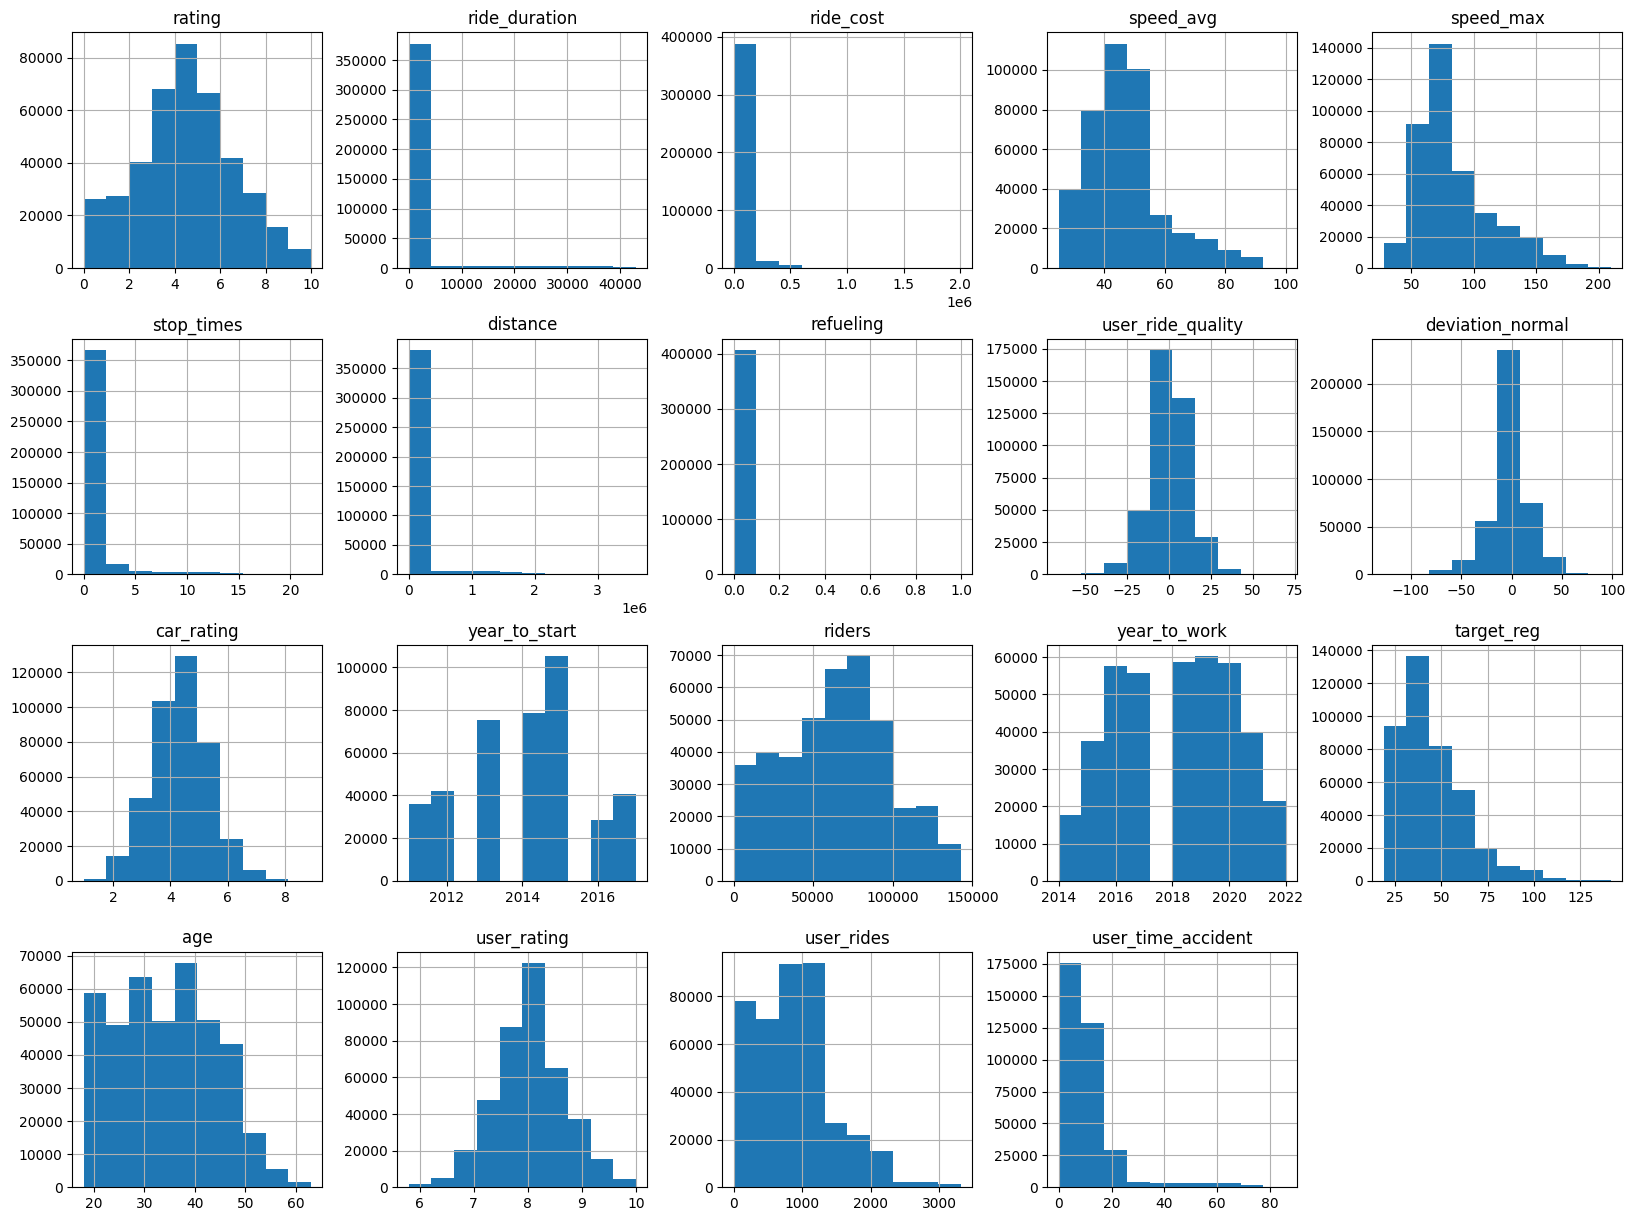

In [128]:
rides_info.drop("sex", axis=1).hist(figsize=(20, 15), layout=(-1, 5));

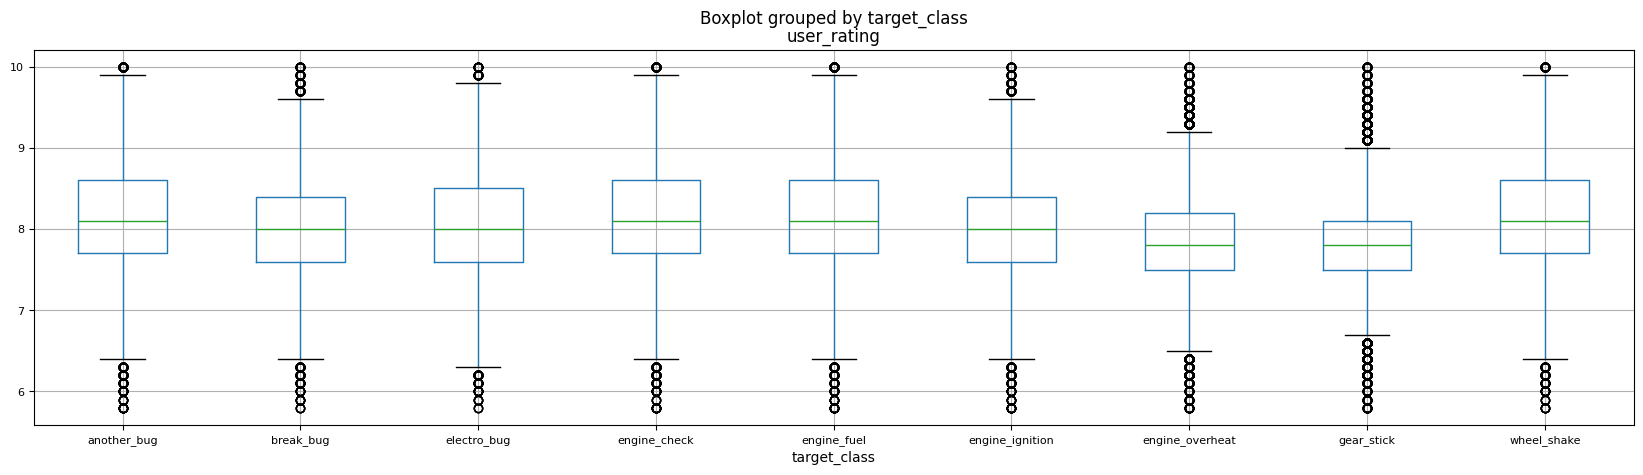

In [129]:
rides_info.boxplot(
    column=["user_rating"], by="target_class", fontsize=8, figsize=(20, 5)
);

In [130]:
corr = rides_info.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap="RdYlGn")

In [131]:
pd.crosstab(
    rides_info["target_class"],
    rides_info["model"],
    # margins = True,
    normalize = True
).style.background_gradient(cmap="RdYlGn")

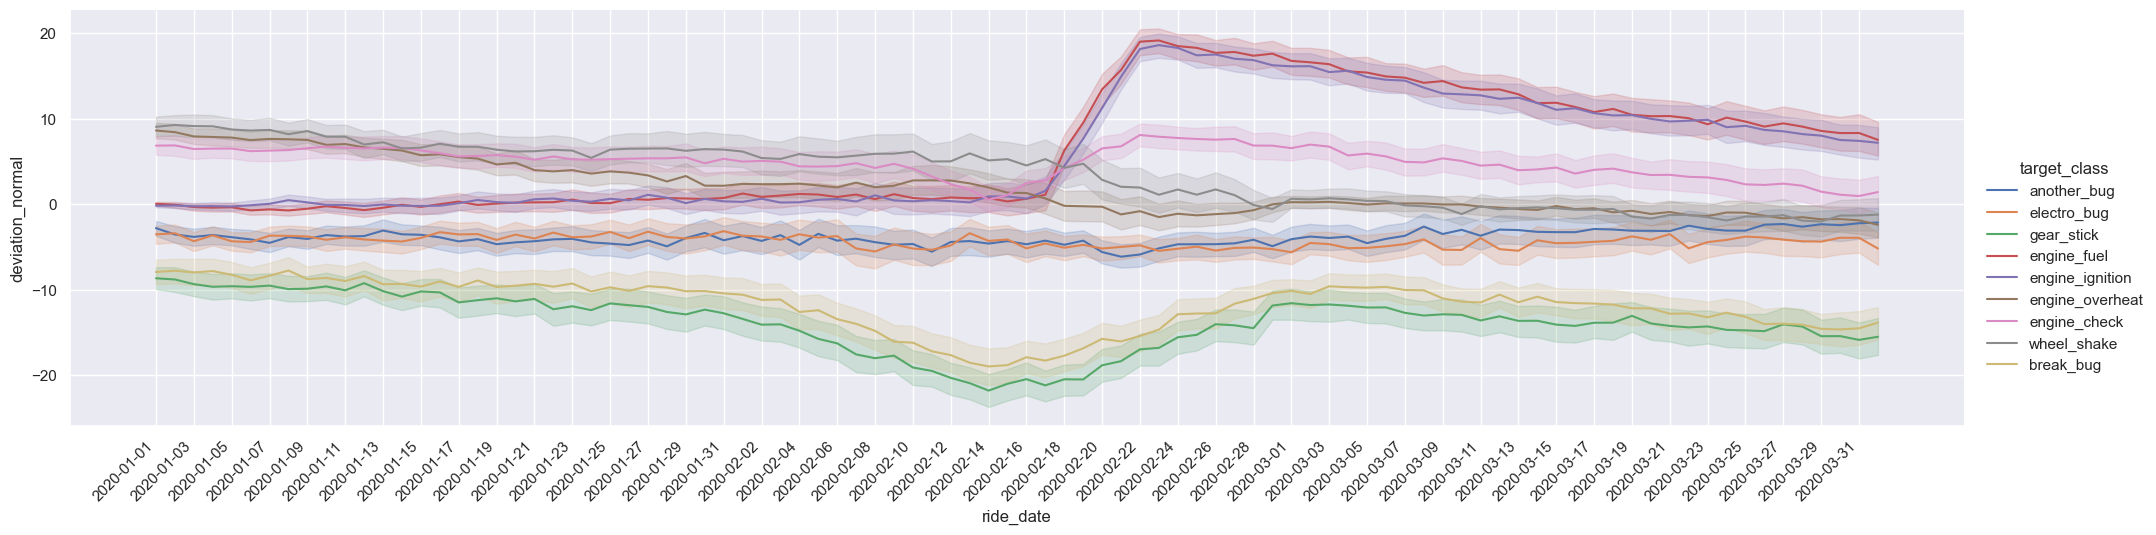

In [132]:
import seaborn as sns
sns.set_theme()

g = sns.relplot(
    data=rides_info,
    x="ride_date",
    y="deviation_normal",
    hue="target_class",
    kind="line",  # или scatter
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

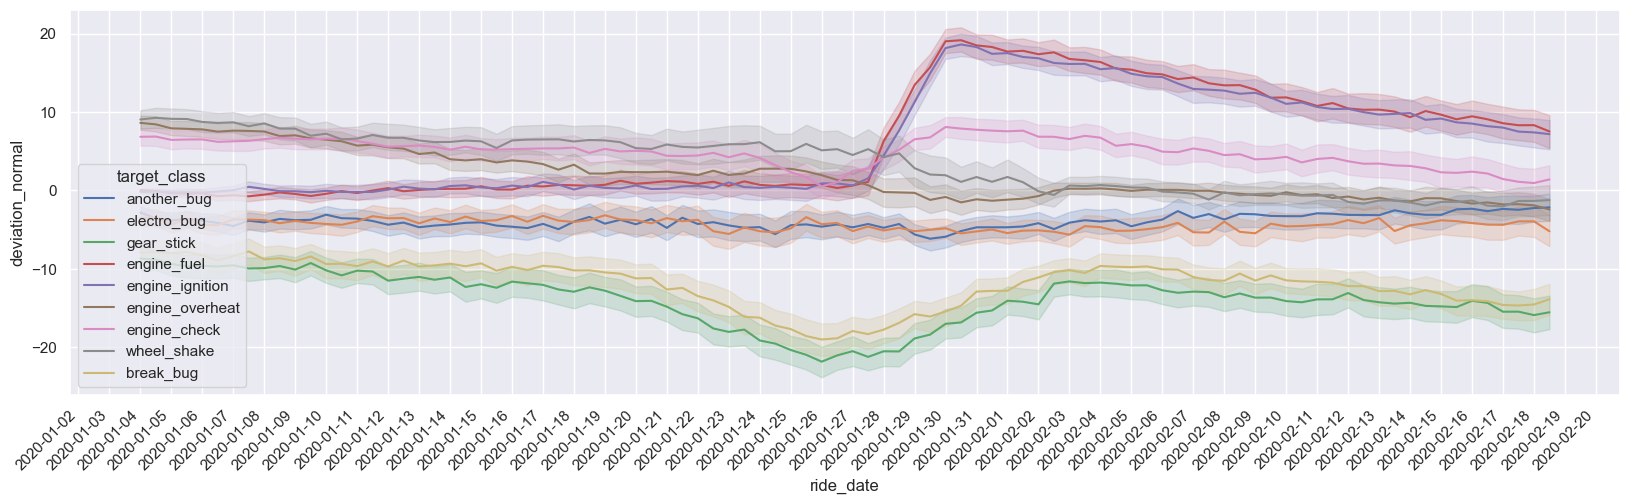

In [133]:
# Импортируем вспомогательные фрагменты из matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 5))

g = sns.lineplot(
    data=rides_info,
    x="ride_date",
    y="deviation_normal",
    hue="target_class",
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
g.xaxis.set_major_locator(ticker.MultipleLocator(2));

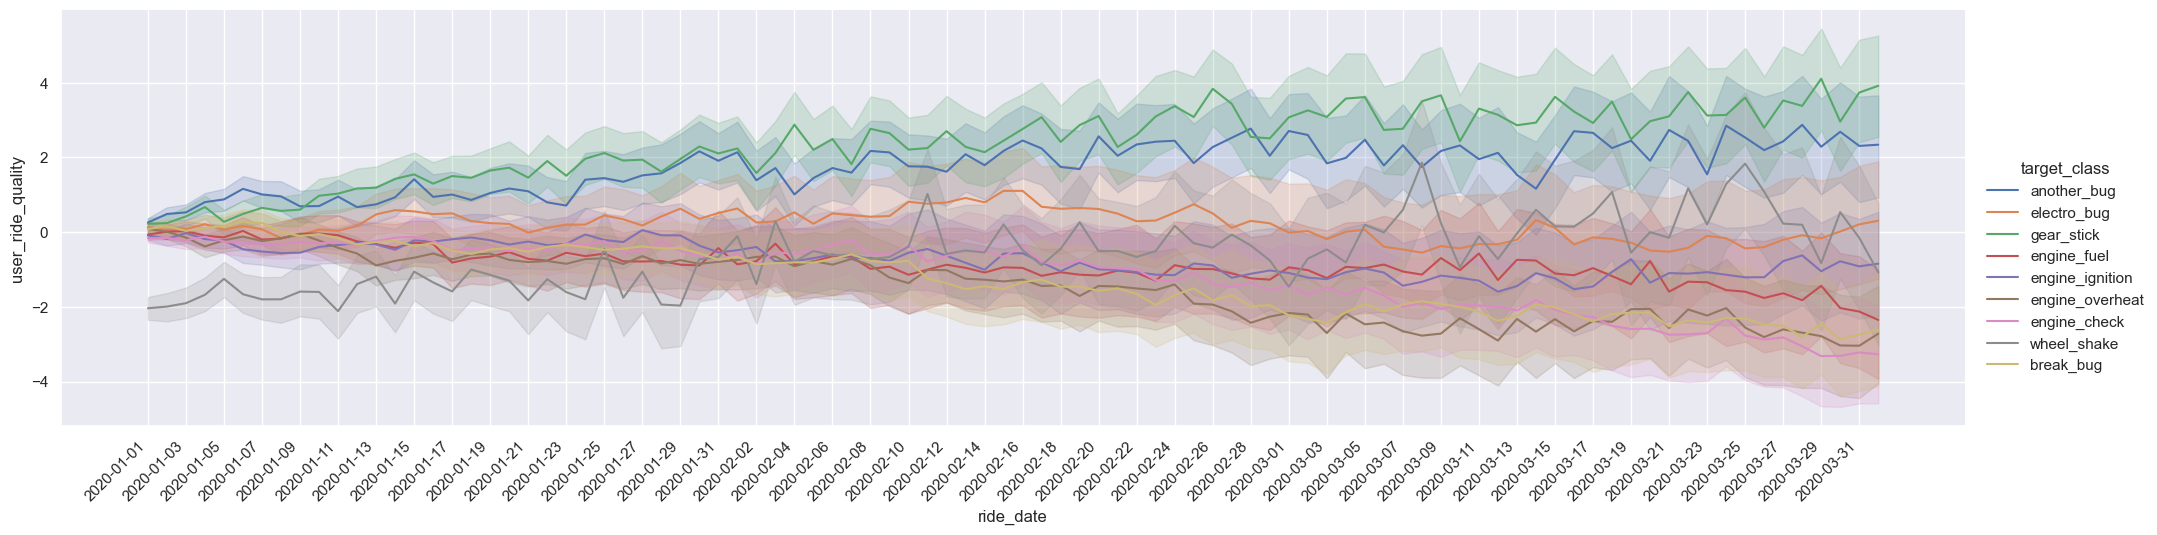

In [134]:
g = sns.relplot(
    data=rides_info,
    x="ride_date",
    y="user_ride_quality",
    kind="line",
    hue="target_class",
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

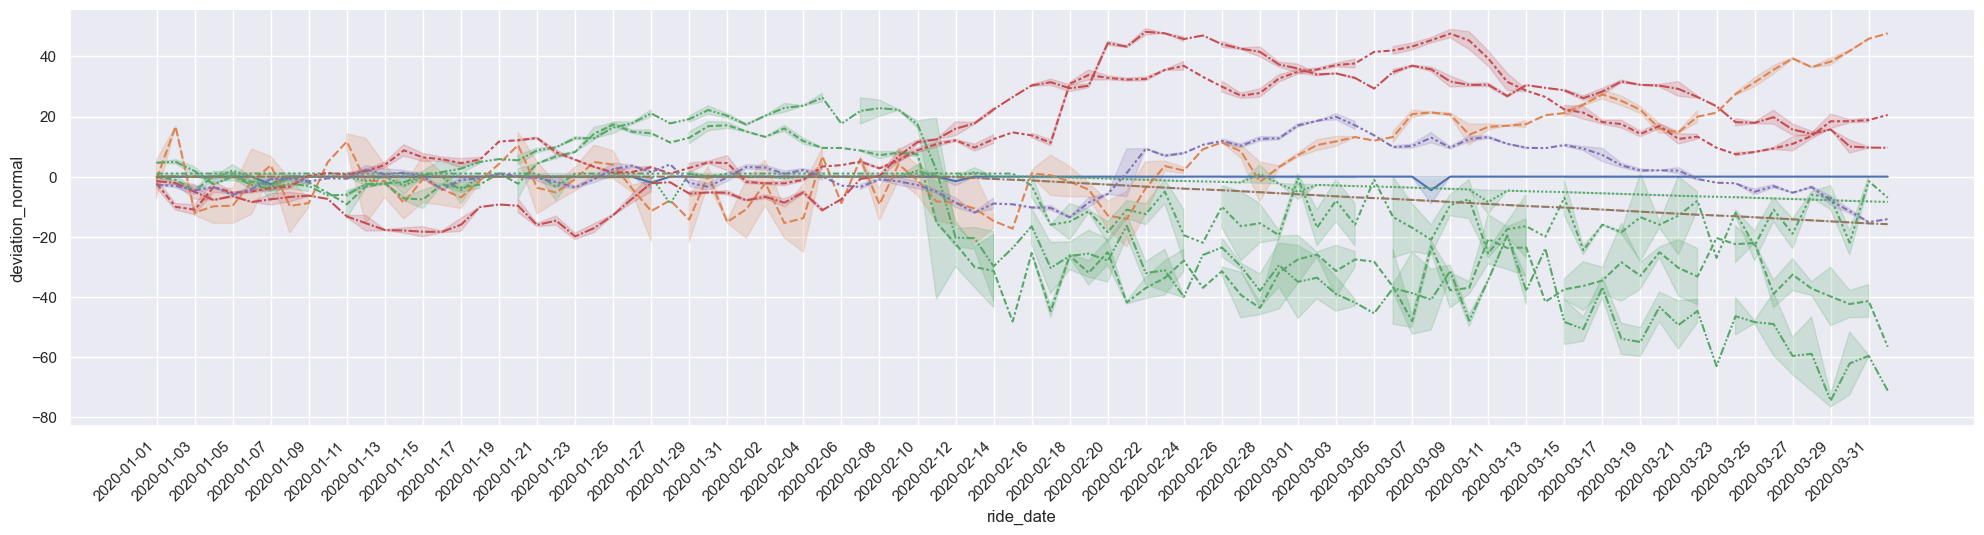

In [135]:
tmp = rides_info[rides_info["car_id"].isin(rides_info.car_id.unique()[:10])]

g = sns.relplot(
    data=tmp,
    
    x="ride_date",
    y="deviation_normal",
    
    hue="target_class",
    style="car_id",
    
    legend=False,
    kind="line",
    aspect=4,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2)

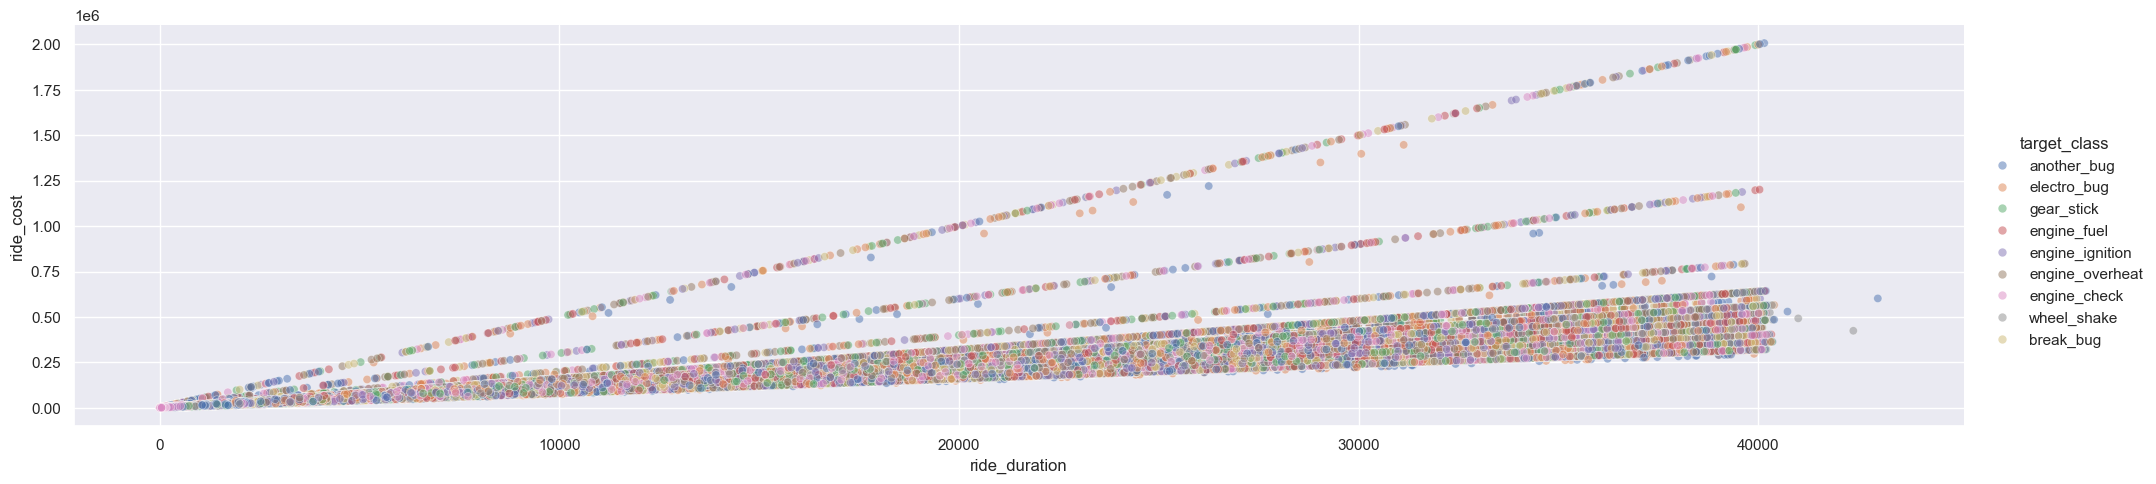

In [136]:
g = sns.relplot(
    data=rides_info,
    x="ride_duration",
    y="ride_cost",
    hue="target_class",
    
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

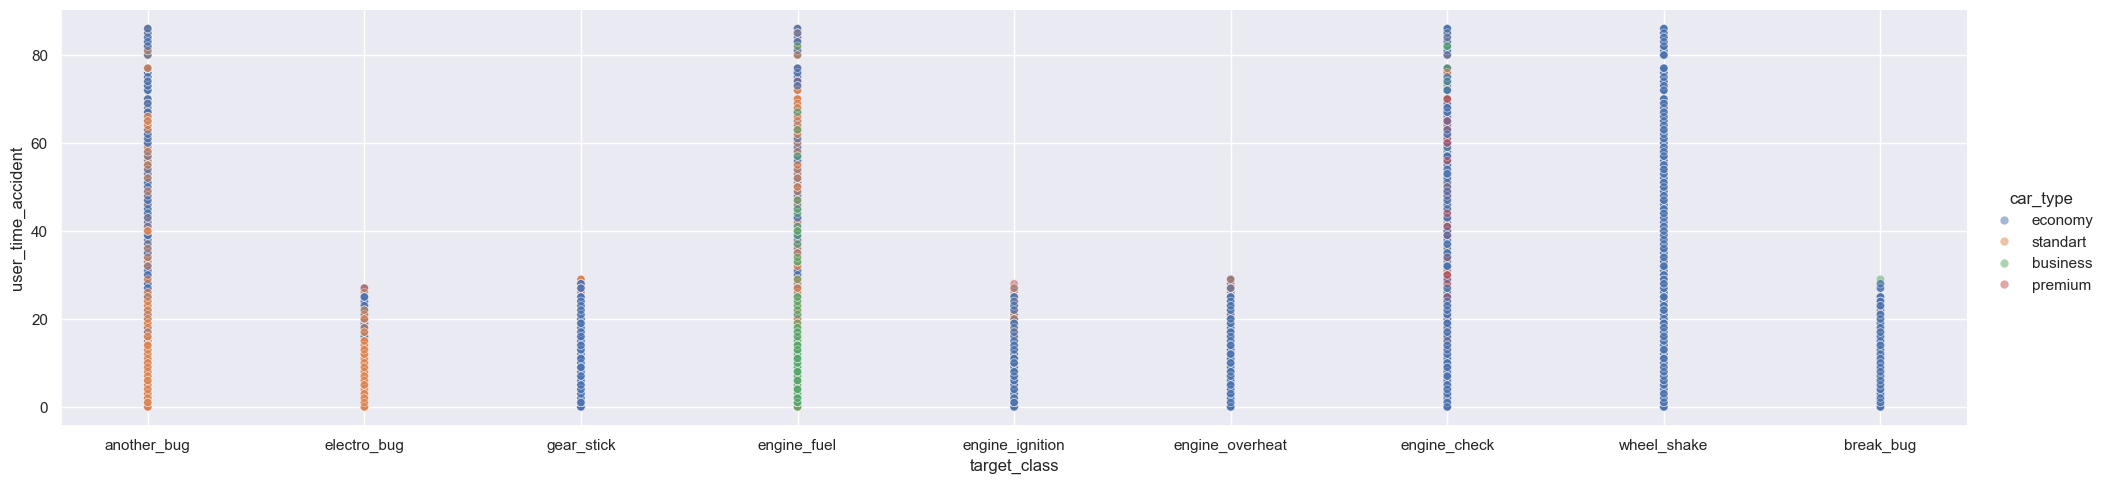

In [137]:
g = sns.relplot(
    data=rides_info,
    x="target_class",
    
    y="user_time_accident",
    
    hue="car_type",
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

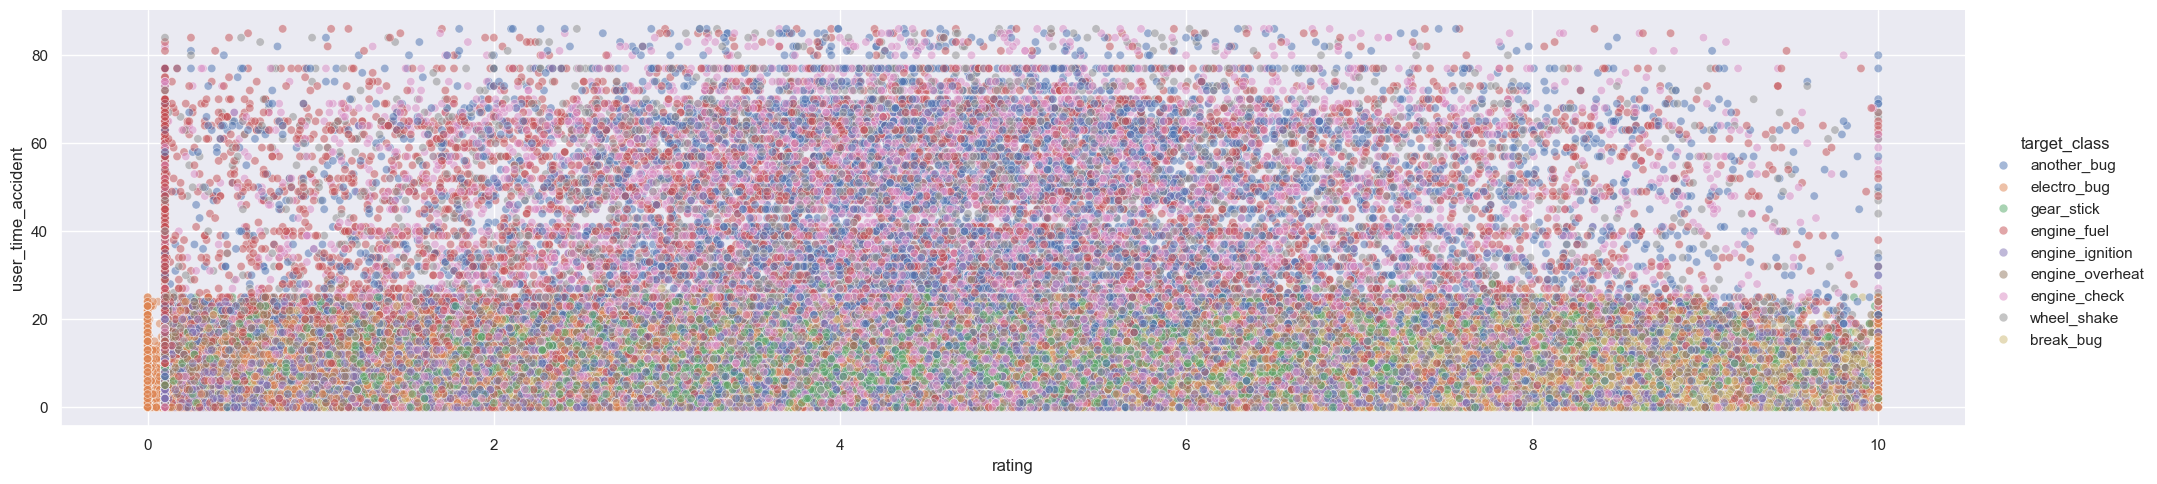

In [138]:
sns.relplot(
    data=rides_info,
    x="rating",
    y="user_time_accident",
    hue="target_class",
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

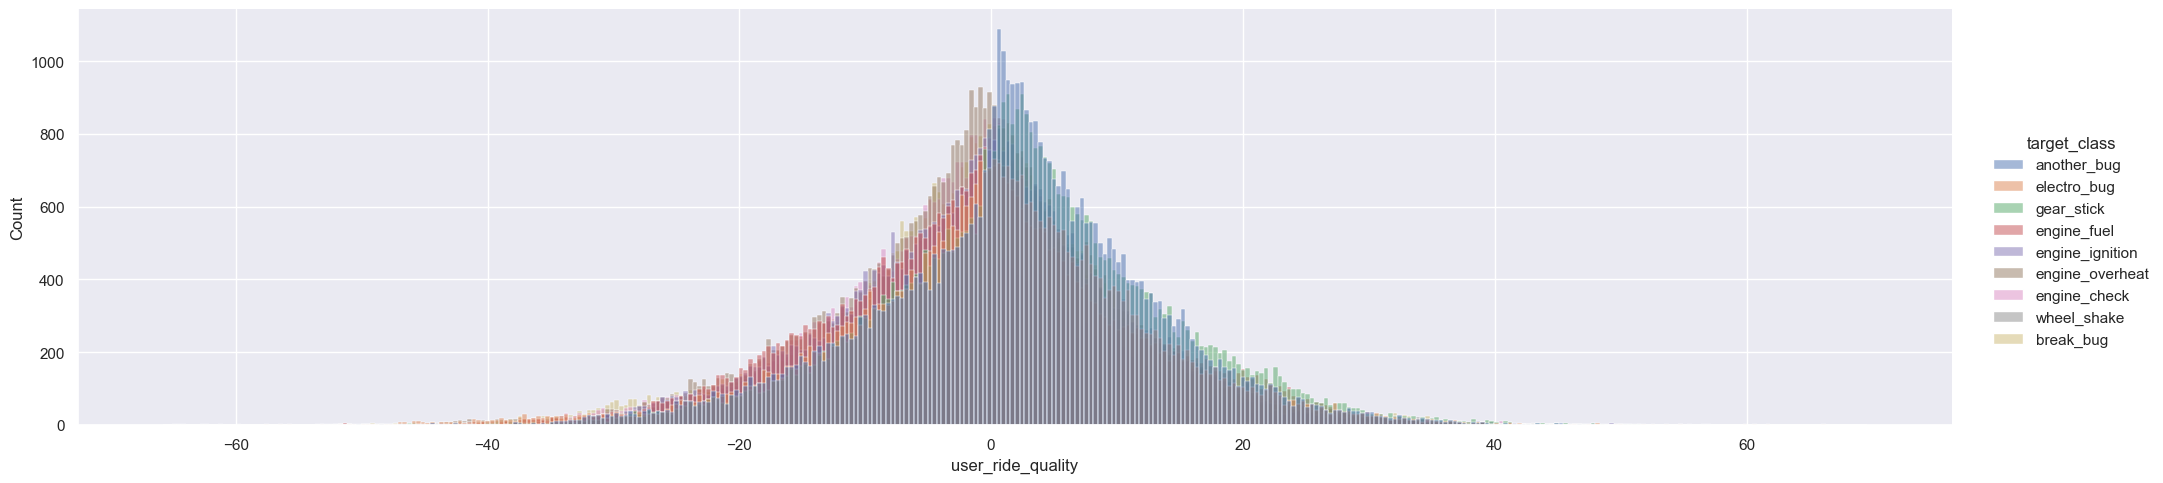

In [139]:
tmp = rides_info[rides_info["car_id"].isin(rides_info.sample(100).car_id.unique()[:20])]

g = sns.displot(
    data=rides_info,
    
    x="user_ride_quality",
    # y="user_time_accident",
    
    hue="target_class",
    legend=True,
    aspect=4,
    kind="hist",  # kde
    alpha=0.5,
);

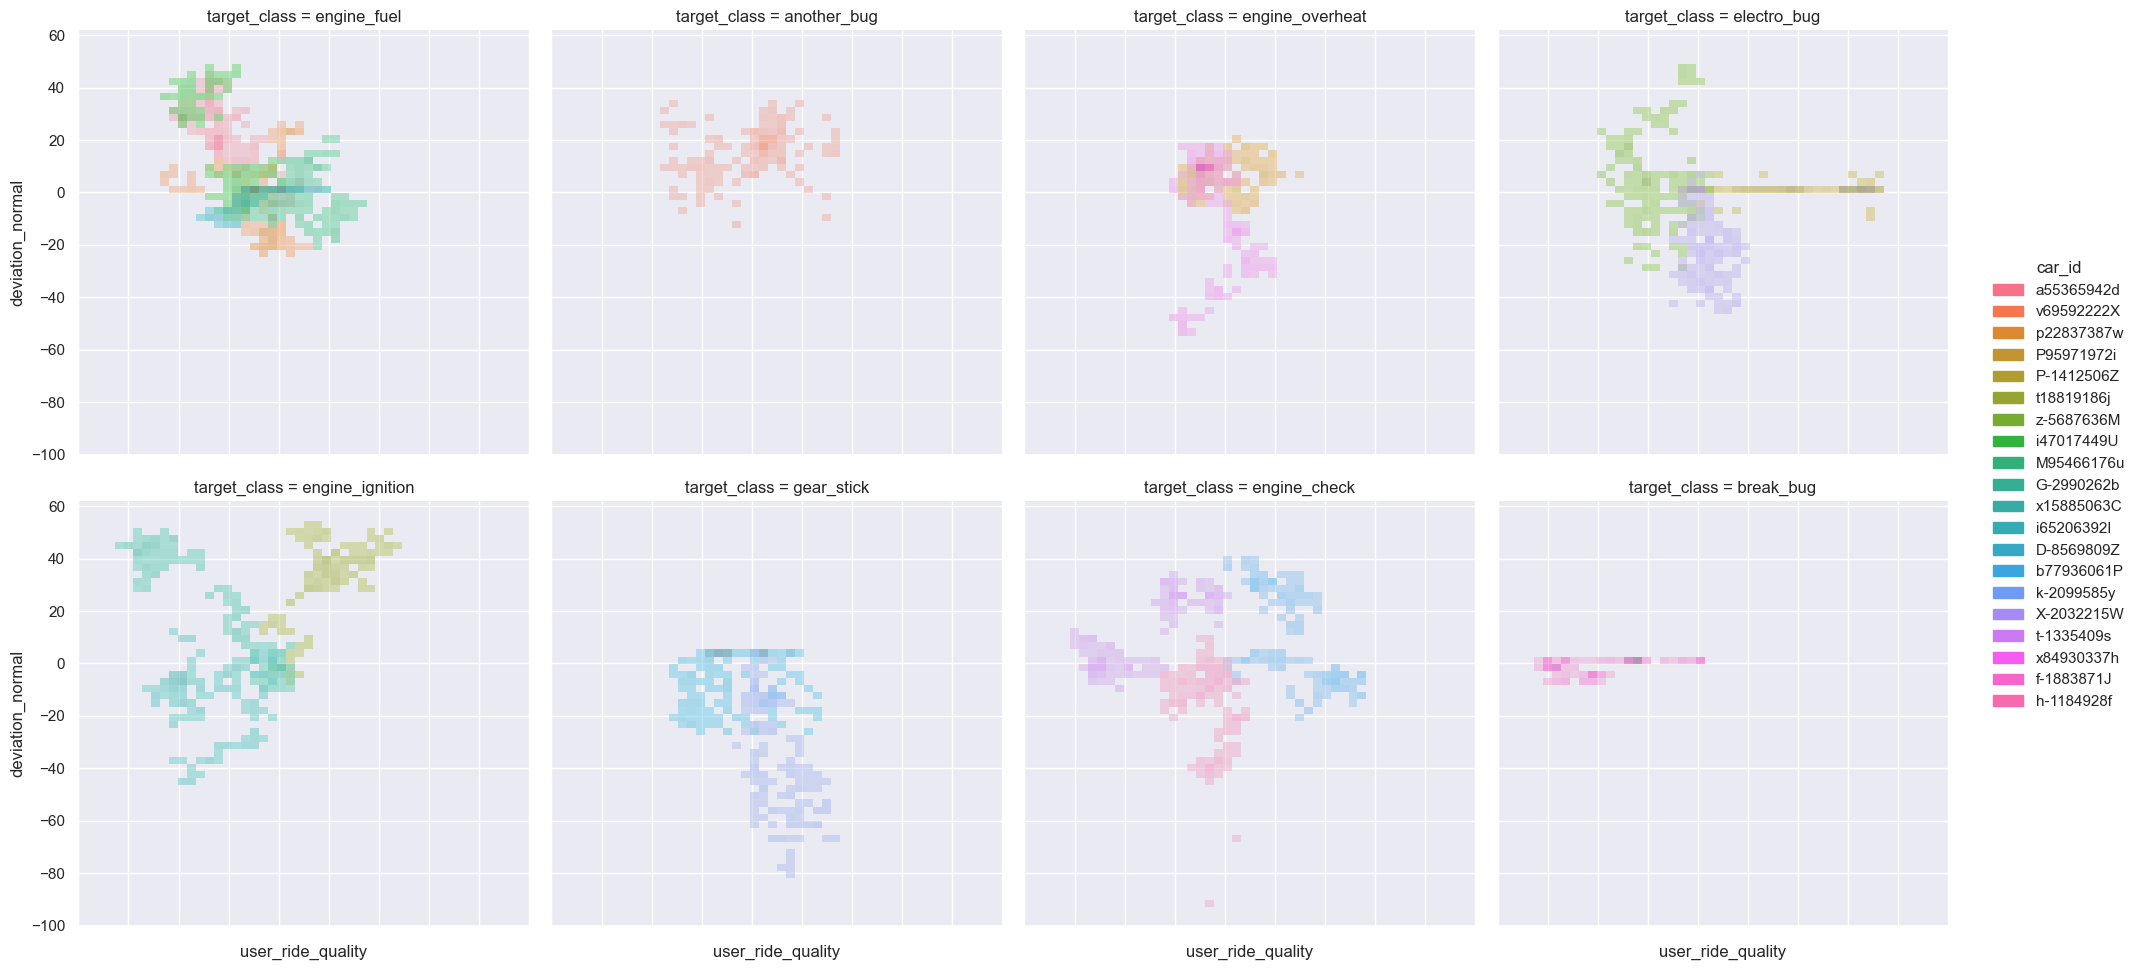

In [140]:
tmp = rides_info[rides_info["car_id"].isin(rides_info.sample(100, random_state=10).car_id.unique()[:20])]

g = sns.displot(
    data=tmp,
    
    x="user_ride_quality",
    y="deviation_normal",
    
    aspect=1,
    # kind="kde",
    alpha=0.5,
    
    hue="car_id",
    col="target_class",
    
    col_wrap=4,
    
).set_xticklabels(rotation=45, horizontalalignment="right");

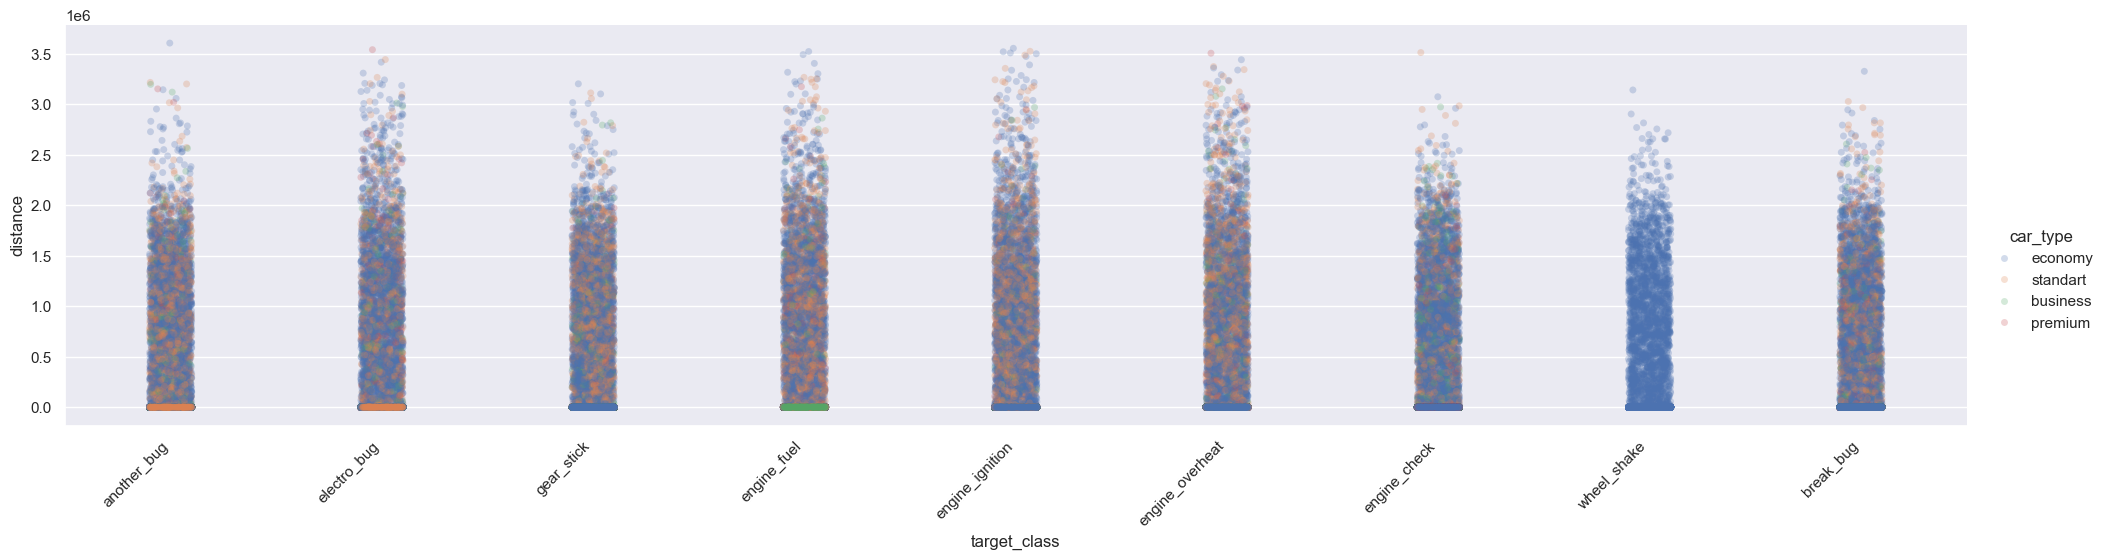

In [141]:
sns.catplot(
    data=rides_info,
    x="target_class",
    y="distance",
    
    aspect=4,
    hue="car_type",
    alpha=0.25,
    
).set_xticklabels(rotation=45, horizontalalignment="right");

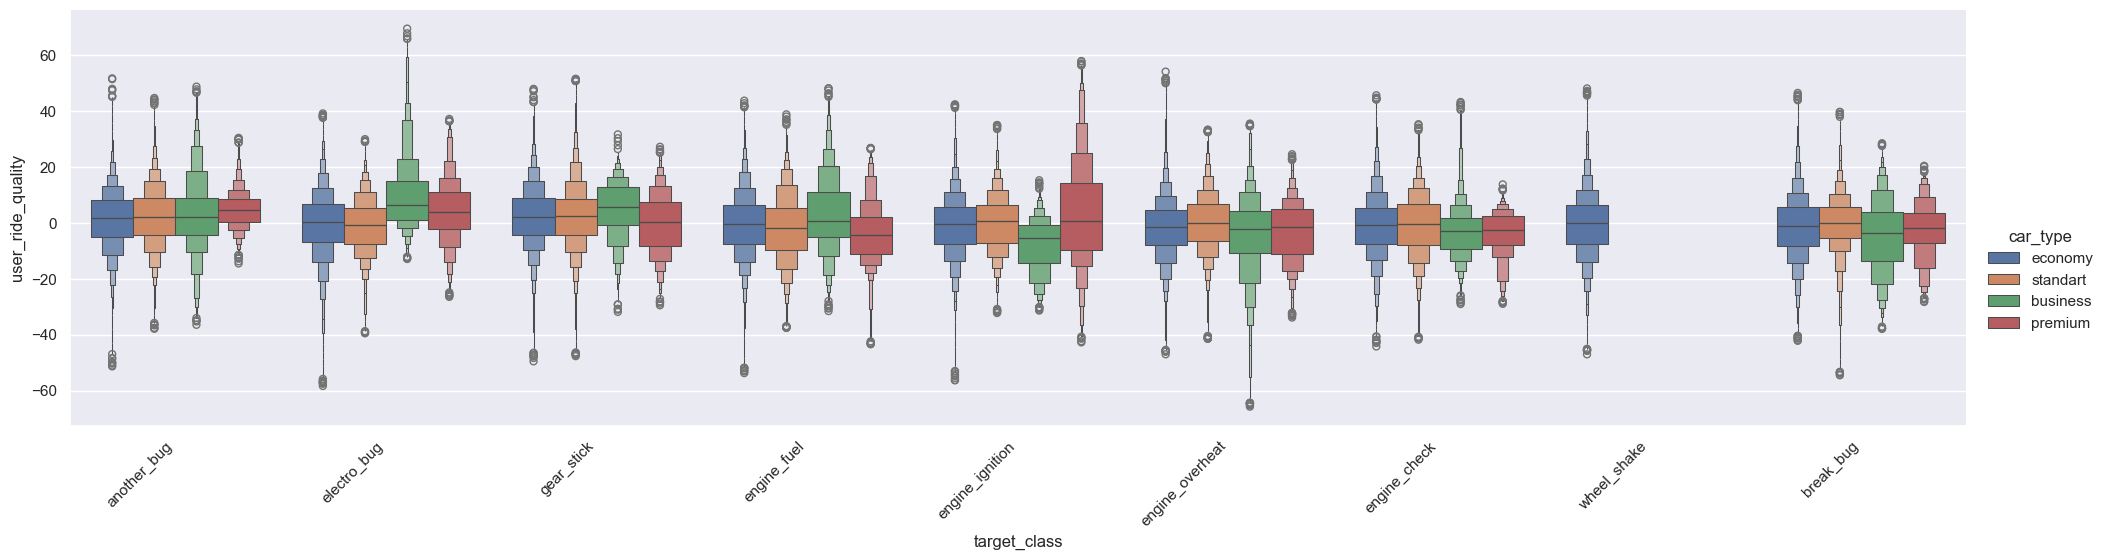

In [142]:
sns.catplot(
    data=rides_info,
    x="target_class",
    y="user_ride_quality",
    hue="car_type",
    aspect=4,
    kind="boxen",
).set_xticklabels(rotation=45, horizontalalignment="right");

In [143]:
rides_info.corr(numeric_only=True)

rating  ride_duration  ride_cost  speed_avg  speed_max  \
rating               1.000          0.001      0.002     -0.086     -0.235   
ride_duration        0.001          1.000      0.915     -0.002      0.000   
ride_cost            0.002          0.915      1.000     -0.001     -0.000   
speed_avg           -0.086         -0.002     -0.001      1.000      0.497   
speed_max           -0.235          0.000     -0.000      0.497      1.000   
stop_times          -0.055          0.010      0.008     -0.130      0.051   
distance            -0.004          0.965      0.883      0.065      0.032   
refueling            0.002          0.005      0.004      0.001     -0.001   
user_ride_quality   -0.000          0.001      0.002     -0.007     -0.009   
deviation_normal    -0.043         -0.000      0.000      0.041      0.087   
car_rating           0.003          0.001     -0.000     -0.005      0.001   
year_to_start        0.001          0.000      0.002     -0.002     -0.013   
riders               0.001          0.000      0.002     -0.002     -0.014   
year_to_work         0.001         -0.000      0.005      0.000     -0.003   
target_reg          -0.003         -0.003      0.007     -0.025      0.149   
age                  0.002         -0.003      0.000      0.002     -0.001   
user_rating          0.003         -0.000      0.006     -0.003      0.007   
user_rides          -0.002         -0.000      0.001     -0.001     -0.001   
user_time_accident   0.000         -0.001     -0.000     -0.023      0.004   
sex                 -0.005          0.001     -0.000     -0.000      0.002   

                    stop_times  distance  refueling  user_ride_quality  \
rating                  -0.055    -0.004      0.002             -0.000   
ride_duration            0.010     0.965      0.005              0.001   
ride_cost                0.008     0.883      0.004              0.002   
speed_avg               -0.130     0.065      0.001             -0.007   
speed_max                0.051     0.032     -0.001             -0.009   
stop_times               1.000    -0.007     -0.000              0.020   
distance                -0.007     1.000      0.004              0.000   
refueling               -0.000     0.004      1.000              0.001   
user_ride_quality        0.020     0.000      0.001              1.000   
deviation_normal         0.005     0.002     -0.001             -0.011   
car_rating               0.019     0.000     -0.003              0.018   
year_to_start            0.008     0.000      0.002             -0.020   
riders                   0.009     0.001      0.002             -0.021   
year_to_work             0.003     0.000     -0.003              0.022   
target_reg               0.194    -0.006      0.001              0.026   
age                     -0.003    -0.003      0.001             -0.004   
user_rating              0.032    -0.001     -0.001             -0.003   
user_rides              -0.001    -0.000     -0.002              0.002   
user_time_accident       0.098    -0.003     -0.001              0.005   
sex                      0.006     0.001     -0.003              0.004   

                    deviation_normal  car_rating  year_to_start  riders  \
rating                        -0.043       0.003          0.001   0.001   
ride_duration                 -0.000       0.001          0.000   0.000   
ride_cost                      0.000      -0.000          0.002   0.002   
speed_avg                      0.041      -0.005         -0.002  -0.002   
speed_max                      0.087       0.001         -0.013  -0.014   
stop_times                     0.005       0.019          0.008   0.009   
distance                       0.002       0.000          0.000   0.001   
refueling                     -0.001      -0.003          0.002   0.002   
user_ride_quality             -0.011       0.018         -0.020  -0.021   
deviation_normal               1.000       0.022          0.010   0.012   
c

In [144]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 12)

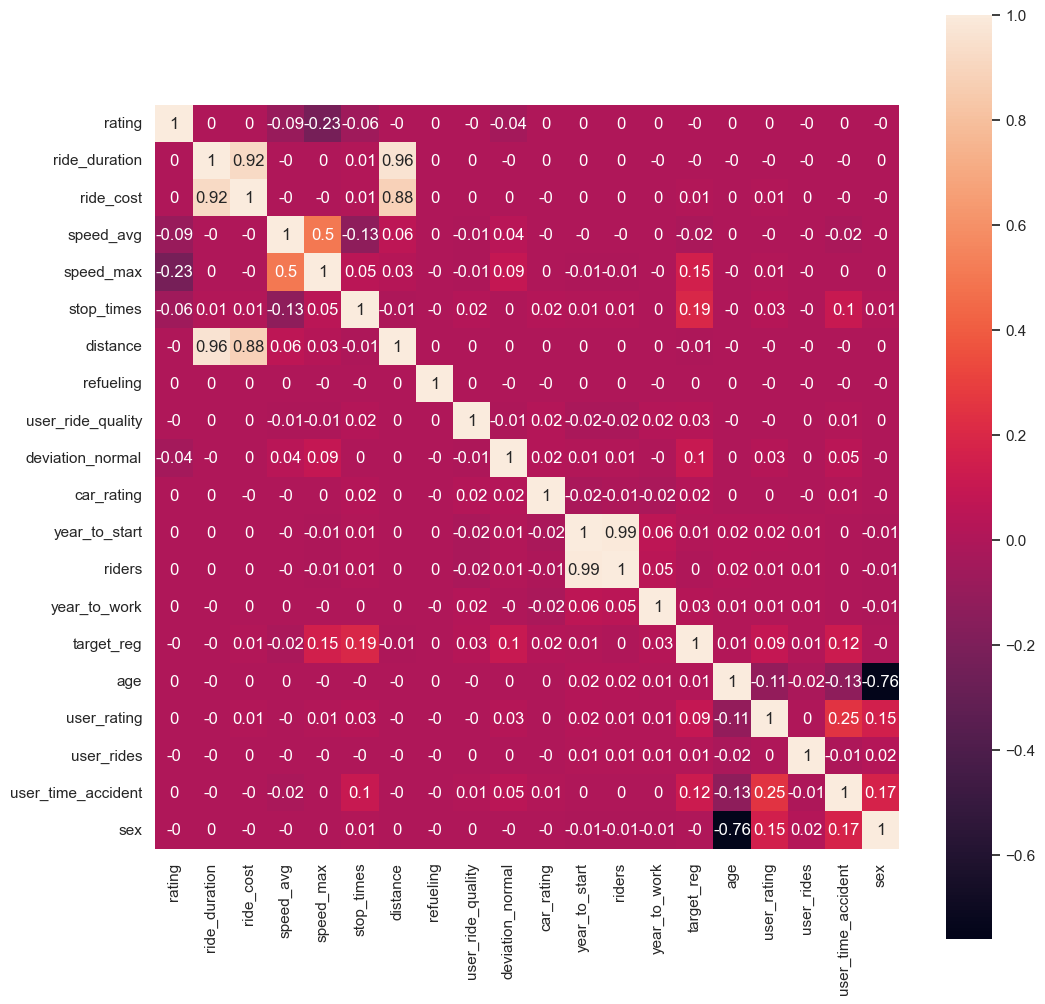

In [145]:
sns.heatmap(
    data=rides_info.corr(numeric_only=True).round(2),
    square=True,
    annot=True,
);

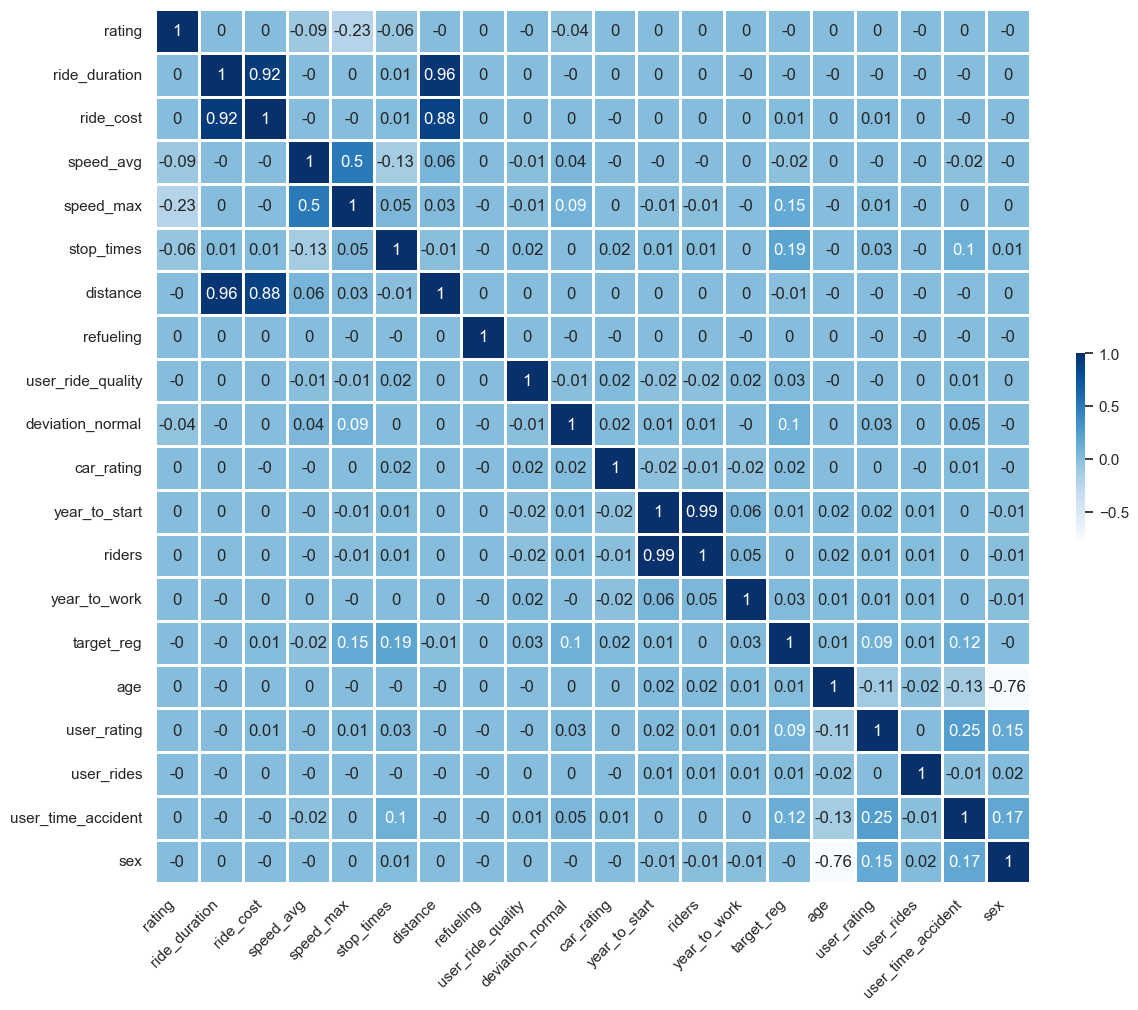

In [146]:
heatmap = sns.heatmap(
    rides_info.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    
    cmap="Blues",  # использовать синюю цветовую карту
    cbar_kws={"fraction": 0.01},  # боковой колор-бар (shrink colour bar)
    linewidth=2,  # пространство между клетками
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
);

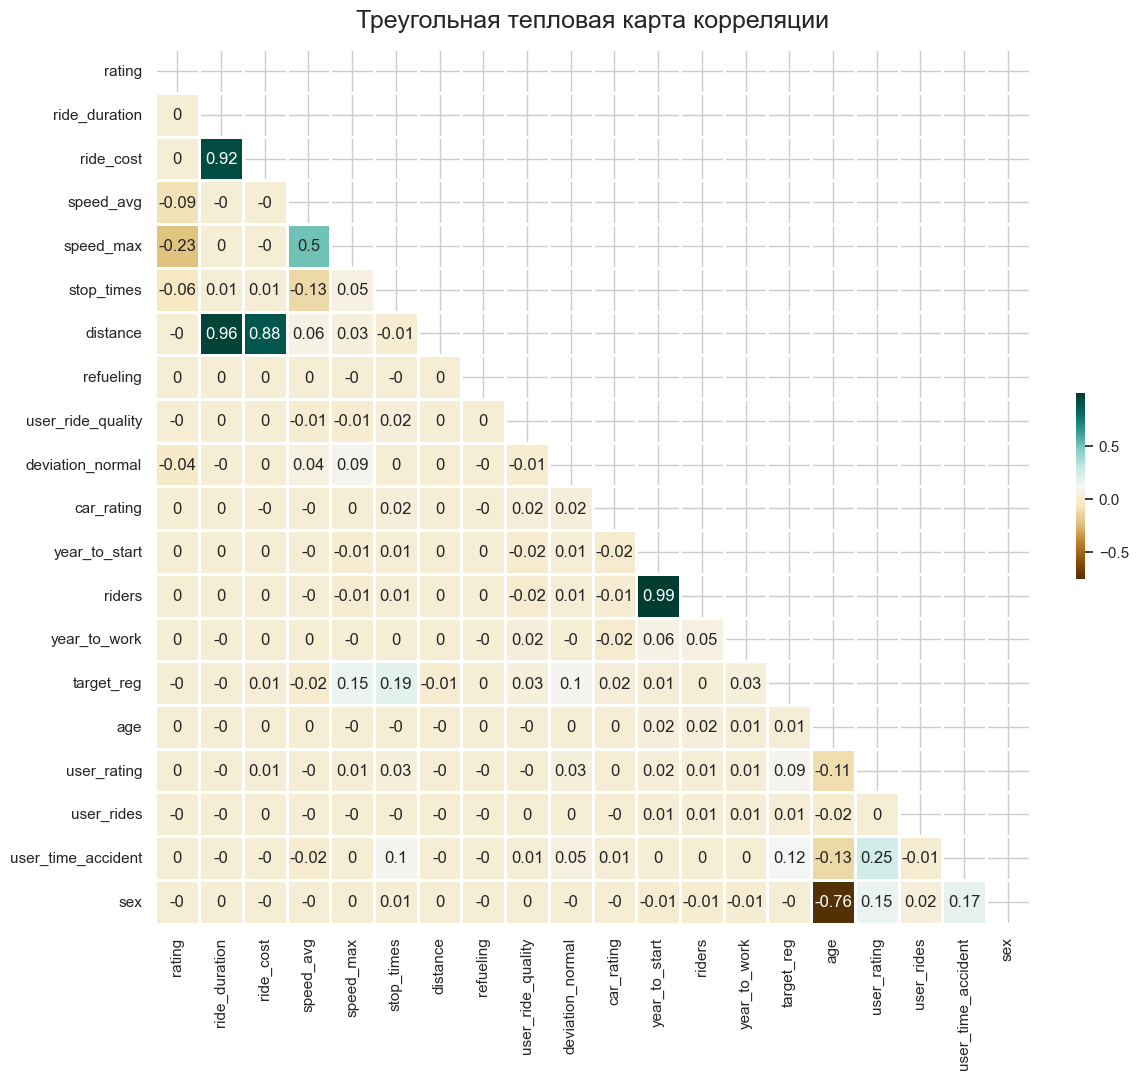

In [147]:
sns.set_style("whitegrid")

# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
mask = np.triu(np.ones_like(rides_info.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    rides_info.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,
    
    mask=mask,
)

heatmap.set_title(
    "Треугольная тепловая карта корреляции", fontdict={"fontsize": 18}, pad=16
);

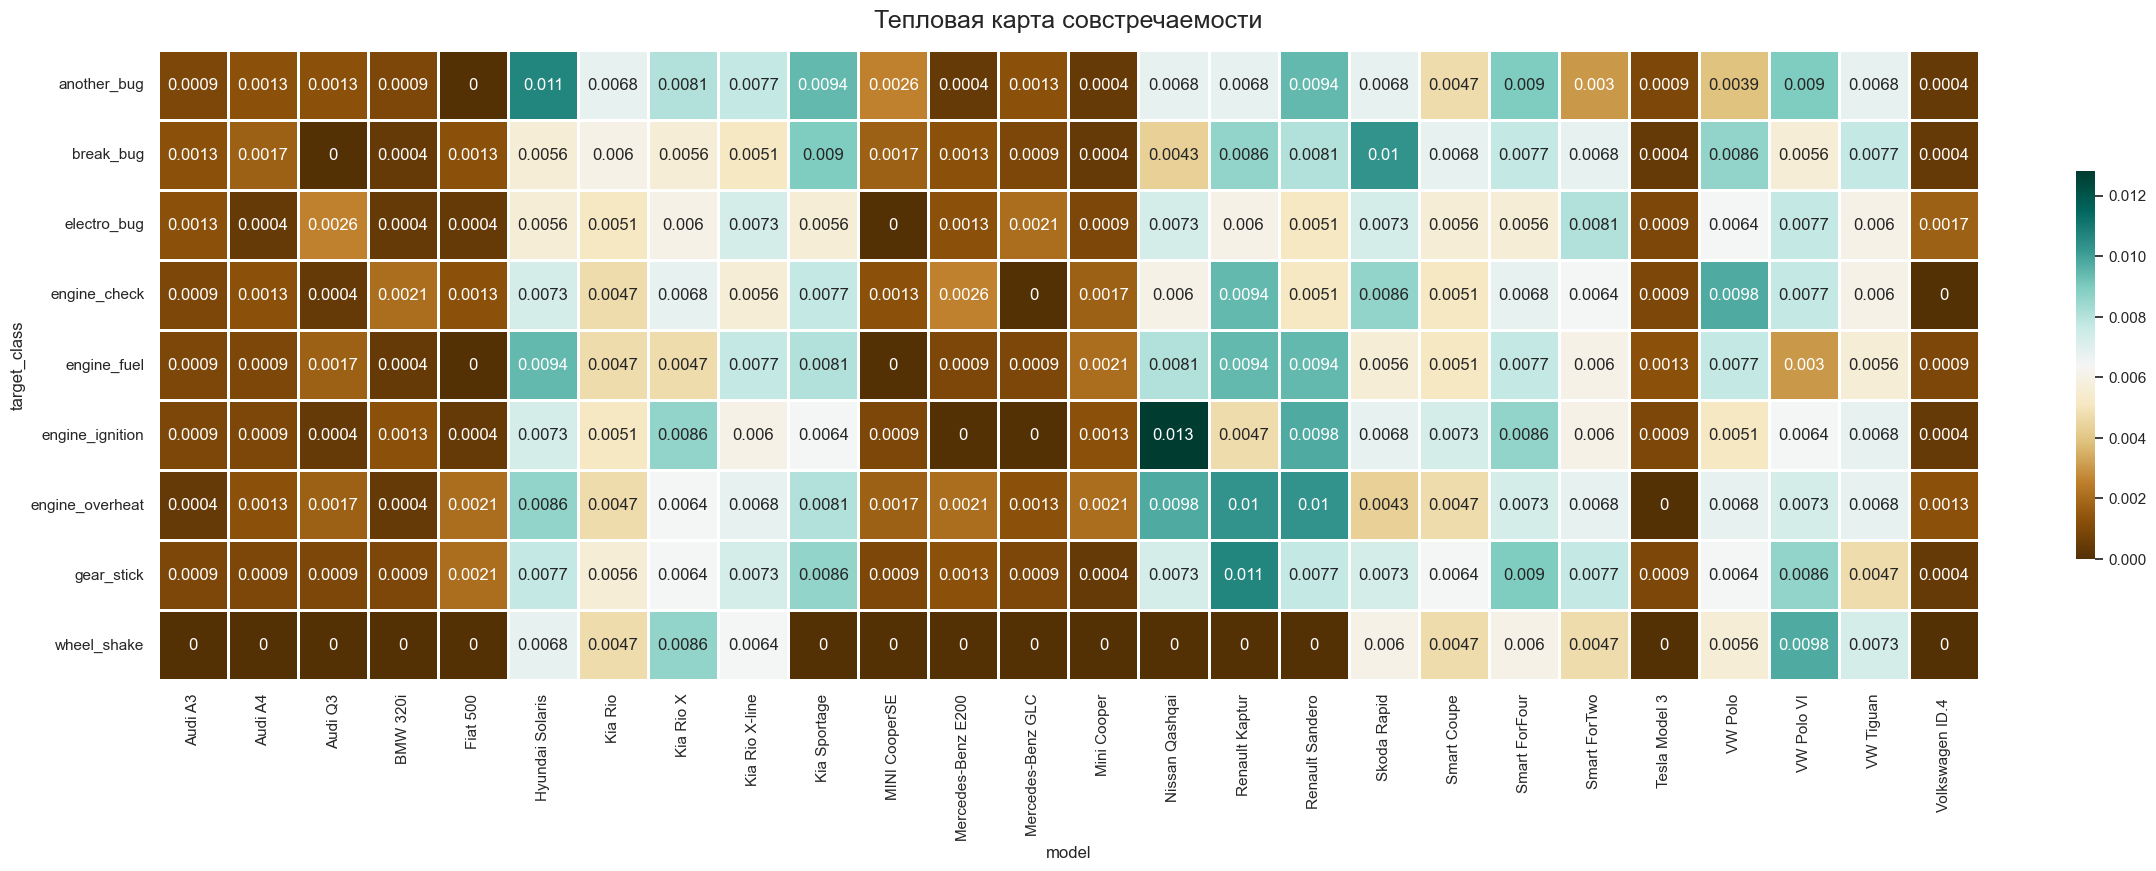

In [148]:
plt.rcParams["figure.figsize"] = (25, 25)

crst = pd.crosstab(
    rides_info["target_class"],
    rides_info["model"],
    normalize=True,
).round(4)


heatmap = sns.heatmap(
    crst,
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,
)

heatmap.set_title("Тепловая карта совстречаемости", fontdict={"fontsize": 18}, pad=16);
sns.pairplot(
    rides_info.sample(1000),
    vars=["speed_max", "distance", "speed_avg"],
    corner=True,
    hue="target_class",
);

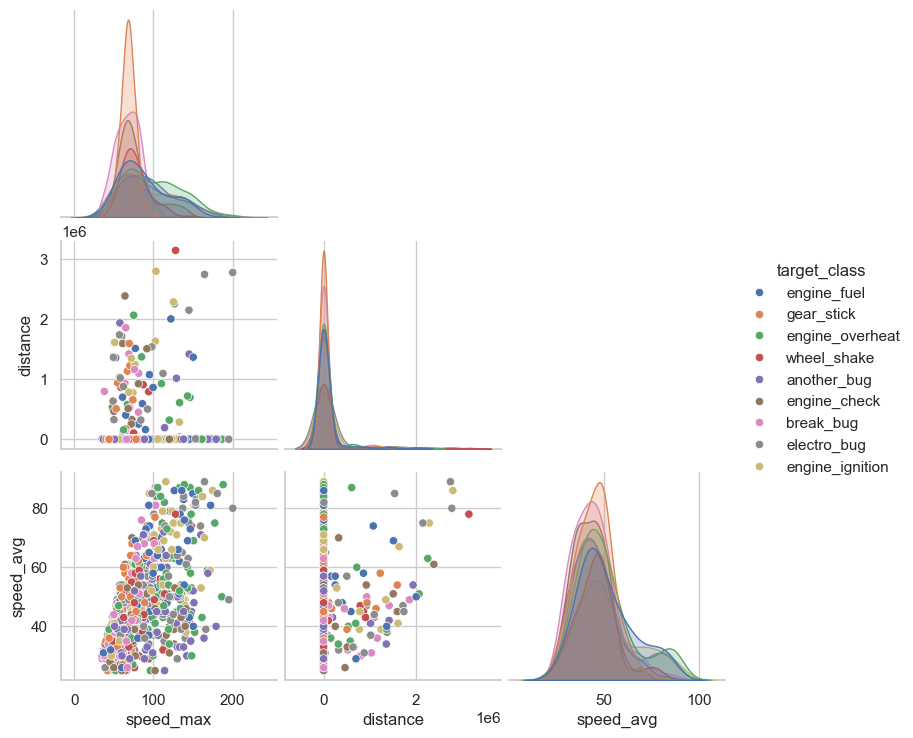

In [149]:
sns.pairplot(
    rides_info.sample(1000),
    vars=["speed_max", "distance", "speed_avg"],
    corner=True,
    hue="target_class",
);